In [73]:
#Library Yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [74]:
#Membaca data berbentuk .CSV
df = pd.read_csv('Data_Nilai_Pegawai.csv')
df.head()

,ID_PERSON,Tingkat_Pendidikan_Akhir,Usia,Satuan_Kerja,Bulan,Nilai
0,1001,7,61,DINAS B,Juli,7.884
1,1002,2,59,DINAS A,Juli,6.952
2,1003,6,57,BADAN D,Juli,8.185
3,1004,0,56,DINAS B,Juli,6.556
4,1005,3,54,DINAS B,Juli,6.347


In [75]:
#Mengecek apakah ada data yang hilang atau tidak
df.isnull().sum()

ID_PERSON                   0
Tingkat_Pendidikan_Akhir    0
Usia                        0
Satuan_Kerja                0
Bulan                       0
Nilai                       0
dtype: int64

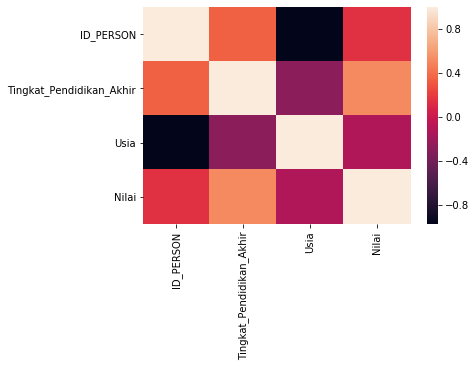

In [76]:
#pengecekan korelasi menggunakan seaborn library,
#terlihat ID_Person, Tingkat_Pendidikan_Akhir, Usia dan Nilai
#merupakan fitur yang berpengaruh paling besar terhadap Nilai
korelasi = df.corr()
sns.heatmap(korelasi)

<BarContainer object of 30 artists>

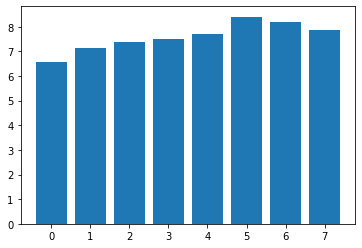

In [77]:
#Menampilkan grafik antara Nilai dan tingkat pendidikan akhir
# ket: 0= SD, 1= SLTP, 2=SLTA, 3= D3, 4=D4, 5=S1, 6=S2, 7=S3
plt.bar(df.Tingkat_Pendidikan_Akhir,df.Nilai)

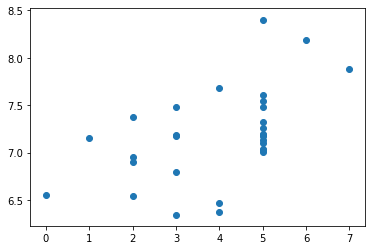

In [78]:
#Melihat Sebaran data bersasarkan tingkat pendidikan akhir dan nilai
plt.scatter(df.Tingkat_Pendidikan_Akhir,df.Nilai)

In [60]:
#mengubah data base menjadi array untuk variabel tingkat pendidikan akhir dan nilai
tabelU = np.array(df.Tingkat_Pendidikan_Akhir)
TPA = np.reshape(tabelTPA,(30,1))
tabelN = np.array(df.Nilai)
nilai = np.reshape(tabelN,(30,1))
print(TPA)
print(nilai)

[[7]
 [2]
 [6]
 [0]
 [3]
 [3]
 [2]
 [5]
 [3]
 [3]
 [1]
 [4]
 [5]
 [2]
 [5]
 [5]
 [3]
 [5]
 [4]
 [5]
 [5]
 [2]
 [5]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[7.884]
 [6.952]
 [8.185]
 [6.556]
 [6.347]
 [6.794]
 [6.546]
 [7.179]
 [7.485]
 [7.19 ]
 [7.152]
 [6.377]
 [7.546]
 [7.378]
 [7.604]
 [7.002]
 [7.18 ]
 [7.477]
 [6.472]
 [7.13 ]
 [7.322]
 [6.902]
 [7.193]
 [7.19 ]
 [7.684]
 [7.102]
 [7.265]
 [8.404]
 [7.043]
 [7.032]]


In [79]:
#Proses Clustering dengan metode K-Means
#Membuat Objek K-Means
kmeans = KMeans(n_clusters=2,max_iter= 500)
# Mencocokan objek kmeans ke data
kmeans.fit(nilai,usia)
# menampilkan lokasi cluster center kmeans
print(kmeans.cluster_centers_)
# Menyimpan hasil clustering
y_km = kmeans.fit_predict(nilai,usia)
y_km

[[6.94885714]
 [7.73855556]]


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0])

C:\Users\Erizka Banuwati C\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


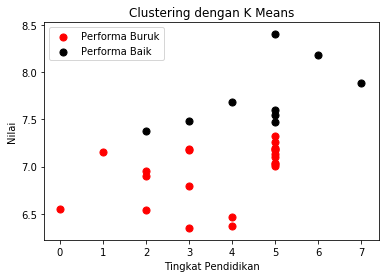

In [80]:
#Menampilkan Hasil clustering pegawai dengan performansi baik dan buruk
plt.ylabel("Nilai")
plt.xlabel("Tingkat Pendidikan")
plt.title ("Clustering dengan K Means")
ax = plt.subplot(111)
ax.scatter(df.Tingkat_Pendidikan_Akhir[y_km ==0], df.Nilai[y_km == 0], s=50, c='red', label= 'Performa Buruk')
ax.scatter(df.Tingkat_Pendidikan_Akhir[y_km ==1], df.Nilai[y_km == 1], s=50, c='black', label= 'Performa Baik')
ax.legend()
plt.show()

In [115]:
#menambahkan tabel hasil dari clustering
df['Hasil']=y_km
print(df)

    ID_PERSON  Tingkat_Pendidikan_Akhir  Usia Satuan_Kerja Bulan  Nilai  Hasil
0        1001                         7    61      DINAS B  Juli  7.884      1
1        1002                         2    59      DINAS A  Juli  6.952      0
2        1003                         6    57      BADAN D  Juli  8.185      1
3        1004                         0    56      DINAS B  Juli  6.556      0
4        1005                         3    54      DINAS B  Juli  6.347      0
5        1006                         3    48      DINAS B  Juli  6.794      0
6        1007                         2    47      DINAS B  Juli  6.546      0
7        1008                         5    47      BADAN B  Juli  7.179      0
8        1009                         3    47      DINAS P  Juli  7.485      1
9        1010                         3    43      DINAS A  Juli  7.190      0
10       1011                         1    43      DINAS F  Juli  7.152      0
11       1012                         4    42      D